In [7]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd

In [12]:
df = pl.read_csv("~/projects/xrr_notebooks/dft_sorted/znpc_params_cluster.csv")
exp = pl.DataFrame(pd.read_csv("~/projects/xrr_notebooks/dft_sorted/nexafs")).filter(
    pl.col("E_55").is_not_null()
)
print(df.columns)
df, exp

['energy', 'xx', 'yy', 'zz', 'xx_norm', 'yy_norm', 'zz_norm', 'planar', 'perp', 'theta', 'wid', 'atom', 'transition']


(shape: (19, 13)
 ┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬──────┬────────────┐
 │ energy    ┆ xx        ┆ yy        ┆ zz        ┆ … ┆ theta     ┆ wid      ┆ atom ┆ transition │
 │ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---  ┆ ---        │
 │ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64      ┆ f64  ┆ f64        │
 ╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════╪════════════╡
 │ 284.22241 ┆ 27.432732 ┆ 27.432732 ┆ 20232.971 ┆ … ┆ 0.109862  ┆ 0.68723  ┆ 2.0  ┆ 117.0      │
 │ 285.06207 ┆ 4.107004  ┆ 4.107004  ┆ 33525.117 ┆ … ┆ 0.009926  ┆ 0.634845 ┆ 3.0  ┆ 119.0      │
 │ 285.50906 ┆ 1.360727  ┆ 1.360727  ┆ 10435.761 ┆ … ┆ 0.010565  ┆ 0.788664 ┆ 1.0  ┆ 117.0      │
 │ 286.10214 ┆ 154.28488 ┆ 154.28488 ┆ 6236.6089 ┆ … ┆ 2.003712  ┆ 0.730991 ┆ 4.0  ┆ 122.0      │
 │ 286.74417 ┆ 920.81226 ┆ 920.81226 ┆ 7620.9673 ┆ … ┆ 9.696708  ┆ 0.682956 ┆ 4.0  ┆ 124.0      │
 │ 

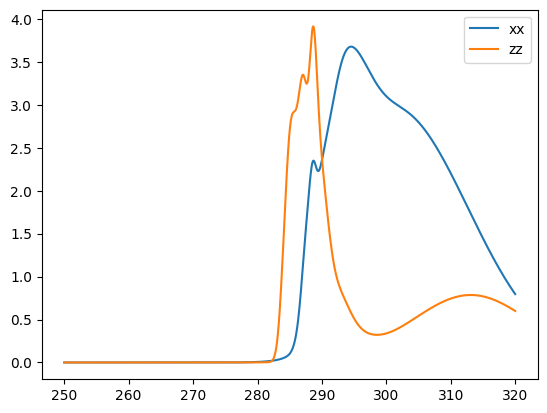

In [31]:
# Each row is a transition associated with a given energy, and tdm orientation


def gaussian(center, width, amplitude):
    # higher order function that returns a function of x
    def f(x):
        return amplitude * np.exp(-((x - center) ** 2) / (2 * width**2))

    return f


def transition(row, lineshape: callable):
    return (
        lineshape(row["energy"], row["wid"], row["planar"]),
        lineshape(row["energy"], row["wid"], row["perp"]),
    )


e = np.linspace(250, 320, 1000)
plane = 0
perp = 0
for row in df.iter_rows(named=True):
    peak = transition(row, gaussian)
    plane += peak[0](e)
    perp += peak[1](e)

plt.plot(e, plane, label="xx")
plt.plot(e, perp, label="zz")
plt.legend()